# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [3]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [16]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

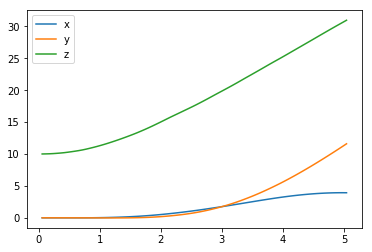

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

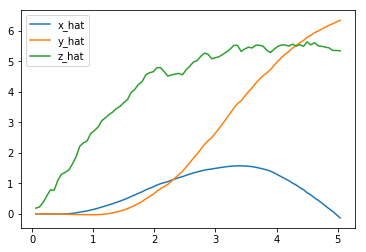

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

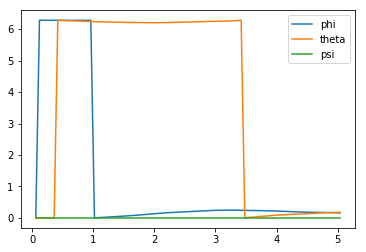

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

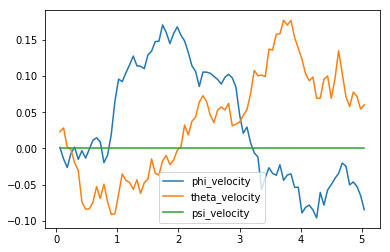

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

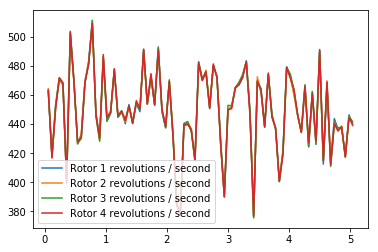

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  3.92773653  11.60198109  30.96592602   0.15856248   0.17903753   0.        ]
[-0.13330164  6.34487243  5.34206037]
[-0.08461655  0.06016726  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [31]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.482 (best =   0.156), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [9]:
## TODO: Train your agent here.
import sys
import pandas as pd
import numpy as np
from agents.agent import DDPG
from task import Task

num_episodes = 350
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = DDPG(task)

best_score = -10000000
worst_score = 10000000

final_results={'episode':[], 'steps':[], 'x_final':[] ,'y_final':[] ,'z_final':[], 'reward':[]}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score=0
    step = 0
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        step += 1
        state = next_state
        score += reward
        best_score = max(best_score , score)
        worst_score = min(worst_score , score)
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f}, best_score = {:7.3f}, worst_score = {:7.3f} ".format(
                i_episode, score, best_score, worst_score), end="")
            break
    final_results['episode'].append(i_episode)
    final_results['steps'].append(step)
    final_results['x_final'].append(task.sim.pose[0])
    final_results['y_final'].append(task.sim.pose[1])
    final_results['z_final'].append(task.sim.pose[2])
    final_results['reward'].append(score)
    sys.stdout.flush()

Episode =  350, score = 368.146, best_score = 373.647, worst_score = -22.668 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

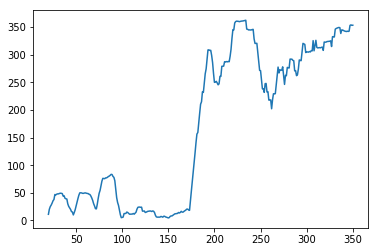

In [27]:
#Simple moving average (SMA) of rewards over 30 episodes
df = pd.DataFrame.from_dict(final_results)
rolling_mean = df.reward.rolling(window=20).mean()

plt.plot(df.episode, rolling_mean, label='Rewards 20 episode SMA')
plt.show()

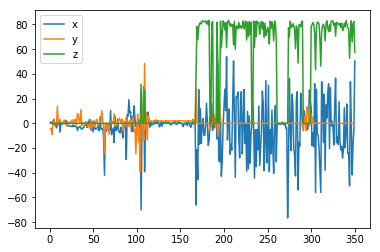

In [68]:
#Final pose of quadcopter at end of each episode
#As can be seen, the agent consistently reaches close to the Z=100 mark at the end of its learning
plt.plot(final_results['episode'], final_results['x_final'], label='x')
plt.plot(final_results['episode'], final_results['y_final'], label='y')
plt.plot(final_results['episode'], final_results['z_final'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Definition of the task**: I designed a task where the agent is required to reach a target pose `[0,0,100]` which is directly above the initial starting pose of the quadcopter `[0,0,10]`. The task was thus a bit simpler than reaching a pose which also requires the agent to change its X and Y positions in addition to the Z position.


**Initial Reward function**: The initial reward function provided was not leading to any learning. Following was the initial reward function:

`1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()`

The agent was hovering all over the place and often would go out of the boundaries and end the episode before utilizing its entire run time. I realized two flaws in the initial reward function that could have caused this problem:
* The initial reward function had a very wide range and would often turn to a large negative value. Hence this lead to a mechanism where the agent would have negative penalties for being far from the target and often the agent would skip these negative penalties by going out of environment bounds and ending the episode early
* The agent itself didn’t have much idea that staying away from the boundaries (given my target pose is roughly in the middle of the environment cube) is beneficial as it avoids the risk of going out of environment bounds. Hence, some mechanism was needed to disincentivize the agent from going too close to the boundaries and risking going out of the environment


**Final Reward function**:
To remove these possible flaws, I tried various reward functions and finally settled on the following reward function (detailed calculations can be seen in `get_reward()` function within `task.py` code snippet):

`1 - (distance/distance_max)**0.4 + dist_closest_boundary/150 + (-100 if agent out of environment bounds)`

*where*, ***distance*** = euclidean distance to target; ***distance_max*** = max distance that agent can be from the target (since target is `[0,0,100]`, the farthest point in environment would be `[150,150,300]`); ***dist_closest_boundary*** = vertical distance to nearest X/Y boundary

The above reward function can be broken down into two parts:
* `1 - (distance/distance_max)**0.4`: This part is basically rewarding the agent to get close to the target pose – the less the distance, more the reward. This part of function would always be between 0 and 1 and hence is normalized. It also ensures that the gradient of the reward function increases as the agent reaches close to the target, hence motivating the agent to try to reach as close as possible to the target pose and not only hover around to collect more reward
* `dist_closest_boundary/150`: This part is trying to make the agent as far from the X/Y boundaries as possible- the more the distance from the X/Y boundaries, more the reward. Again, this part of function would always be between 0 and 1 and hence is normalized. If the agent tries to get too close to the X/Y edges its distance to nearest boundary is reduced and so are the rewards. The optimal strategy to maximize reward is then to go directly straight up to the target pose and not hover too much in the X/Y directions. Note that I intentionally didn’t try to maximize the distance from the Z boundary as that would lead to conflict of interest with the agent trying to reach a target pose of Z=100 and also trying to be as far as possible from the Z boundary by being in the middle (Z=150)
* `(-100 if agent out of environment bounds)`: This part gave the agent a flat penality of `-100` when the agent went out of environment bounds and ended the episode early. This was to ensure that the agent got extra penalty when it does such an action. This flat penalty is applied outside of the `get_reward()` function and within `step` function in `task.py` as I wanted to avoid this penalty getting multiplied by `action_repeat` times

Thus, this reward function ensured that my twin objectives of reaching the target and not crashing out of environment boundary are achieved

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Algorithm used**: I implemented the DDPG agent which gets the advantages of DQN to vanilla DPG algorithm and works well for continuous actions spaces like the quadcopter environment here. Within the neural network, I tried various layer sizes and architectures but the learning didn’t improve much hence I mostly stuck to the initial architecture and only tweaked some layers and added regularization/batch normalization when needed
<br>

**Hyperparameters used**: The final choices of hyperparameters were:
* Learning rate (alpha) for actor: 0.001 (default)
* Learning rate (alpha) for critic: 0.001 (default)
* Soft update of target weights for actor and critic (tau): 0.01
* Discount factor (gamma): 0.99
* For replay buffer the batch size was 64 and total buffer size was 100000
* Ornstein–Uhlenbeck noise parameters were: mu=0, theta=0.15, sigma=0.2
<br>

**Neural network architecture**:
I used a neural network to implement both the actor and critic processes of the DDPG algorithm.
* For the **actor**, following layers were implemented:
 * A dense layers (sequentially aligned) of size 64 with `relu` activation function with batch normalization and L2 regularization (lambda=0.0001)
 * Another dense layer of size 32 with `relu` activation function with batch normalization and L2 regularization (lambda=0.0001)
 * Then a dense layer of size 4 with sigmoid activation producing a normalized (between 0 to 1) action for each rotor
 * Finally, a custom layer which scales the normalized actions to the desired rotor speed range (0 to 900)
 * A custom loss function is built as `K.mean(-action_gradients * actions)` where `action_gradients` are an input received from the critic network
 * Also an `Adam` optimiser was used


* For the **critic**, there is a state pathway and an action pathway which are later merged to produce a single Q-value `Q(s,a)`:
 * *State pathway*: Two dense layers (sequentially aligned) of size 64 and 32 with `relu` activation with batch normalization and L2 regularization (lambda=0.0001)
 * *Action pathway*: Two dense layers (sequentially aligned) of size 64 and 32 with `relu` activation with batch normalization and L2 regularization (lambda=0.0001)
 * State and action pathways are then merged and a `relu` activation is applied
 * Finally, the output Q values are generated
 * Loss function is the inbuilt `mse`
 * Also an `Adam` optimiser was used
 
This architecture is sufficiently slim and allows for faster learning. Also this architecture ensured that the network learns pretty quickly i.e. in my case it showed good learning at about 150 episode mark. This is important as otherwise this network would have taken a long time to train without a GPU

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
I think the task can be easy or difficult depending on the target goal. In my case, the target was to just reach a target pose which is directly above the initial position of the quadcopter, hence the learning was smooth once we set up the right architecture and especially the right reward function. However, the agent still fell shot of the Z=100 mark as it only reached around Z=80. It thus seemed like the agent is not making the extra effort to go till the target. I assume tweaking the reward function a bit could help i.e. it has an even higher gradient close to the target pose

The agent had minimal episodic rewards in the initial episodes but then at around the 150 episode mark, it started showing good reward yield. Hence, I would say it was mostly an aha moment for the agent. I think this abrupt increase in episodic rewards came after the agent figured out how to avoid the one time penalty of `-100` by staying clear of environment boundaries

The final performance of the agent was satisfactory as it started yielding episodic rewards of above 370 whereas the theoretical max reward that agent can get was 500 i.e. `250 timesteps * 2 max reward per timestep` where 250 timesteps is arrived by dividing runtime (5) by time per step (1/50). However, I would not expect the agent to get to the reward of 500 as that would mean the agent is sitting on the target pose right at the first timestep which is not expected.

The mean episodic reward for final 10 episode was 363 as shown below

In [35]:
# Final Performance 
print("Final Performance (Mean Reward over last 10 episodes): {}".format(np.sum(final_results['reward'][-10:])/10))

Final Performance (Mean Reward over last 10 episodes): 363.67515837796174


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
For me, the hardest part was to get started. I had absolutely no idea what are we supposed to do. I think Udacity RL videos does a good job of explaining complex concepts, however the transition from the materials to the final quadcopter project was a bit abrupt. However, I ramped up by reading the DPG and DDPG whitepaper and also by thoroughly understanding the starting code templates provided by Udacity. In addition, I also read through the `Physics Sim` code (avoiding very scientific parts) that gave me a firm understanding on how the simulator reacts to actions and its orientation (for e.g. that the X/Y axis range from -150 to +150 whereas the Z axis ranges from 0 to +300). I also took some time to understand the best practices for making a reward function and the mentors were helpful in this cause. Infact, I took inspiration for making a reward function from this great video provided by the mentors: [video](https://www.youtube.com/watch?v=0R3PnJEisqk)

Addressing the second question prompt, initially the agent was behaving abruptly and it would end the episode early by going out of environment bounds. I figured out that there is possible flaw in the initial reward function as it provides negative penalty to the agent and hence the agent thinks of maximising reward (reduce negative reward) by ending the episode early by going out of environment bounds. I solved for this by making a positive reward function that gave more rewards for going closer to target pose and staying away from environment boundaries.

Another peculiar thing about my agent was that it wasn't going above Z=80 mark when the target pose was Z=100. I think the agent needs to be provided extra incentive to be able to scale the final barrier. However, I don't think a one-step extra reward after reaching the target pose would help as agent won't have any idea of gradient of increasing reward leading to the episode. This rather needs to be built in as an increasing parallel scaling reward close to the target pose.